In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import beta


# Generative model for a simple casual relationship between height -> weight

In [53]:
from scipy.stats import norm

def sim_weight(num_Heights, beta, sd, low_bound_height = 130, high_bound_height = 180):
    """
    Simulates weight based on following inputs:
        num_Heights: Number of heights to simulate in centimetres
        Beta: Proportion of height that contributes to weight (Estimand)
        sd: Standard deviation of the unobserved error
    """
    # Generate random floats between 130 (inclusive) and 180 (exclusive)
    output_list = []

    low_bound_height = low_bound_height
    high_bound_height = high_bound_height
    for i in range(num_Heights):
        error = norm.rvs(loc = 0, scale = sd, size = 1)[0]
        sampled_Height = np.random.uniform(low_bound_height, high_bound_height)
        Weight = beta * sampled_Height + error
        # Append pairs of weight and height to the output list
        output_list.append([Weight, sampled_Height])

    return output_list


In [58]:
sim_output = sim_weight(num_Heights = 1000, beta = 0.5, sd = 3)
sampled_df = pd.DataFrame(sim_output, columns = ['Weight_kg', 'Height_cm'])
sampled_df

,Weight_kg,Height_cm
0,76.954022,156.580637
1,70.310393,142.259898
2,83.170747,172.831575
3,73.566408,149.726156
4,74.803729,150.274316
...,...,...
995,85.514235,170.675909
996,63.519512,134.934420
997,80.559722,159.662156
998,78.904801,167.114306


<Axes: title={'center': 'Plot of simulated weight and height based on the generative model'}, xlabel='Height_cm', ylabel='Weight_kg'>

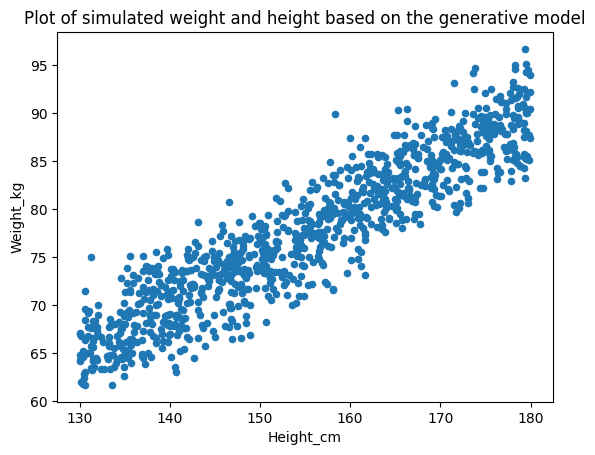

In [59]:
sampled_df.plot(x = 'Height_cm', y = 'Weight_kg', kind = 'scatter', title = "Plot of simulated weight and height based on the generative model")

The higher the sd of error, the more noisy and less linear the sampled data looks

The higher the beta, the stronger the linear relationship appears on the scatter


# Testing Generative Model